IMPORT THƯ VIỆN

In [90]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow

ĐỌC ẢNH

In [48]:
dir_path = ''

#label 1 - ảnh phông nền
img_0 = cv.imread(dir_path + '0.jpg')
img_1 = cv.imread(dir_path + '1.jpg')
img_2 = cv.imread(dir_path + '2.jpg')

#label 0 - ảnh không chứa phông nền
img_3 = cv.imread(dir_path + '3.jpg')
img_4 = cv.imread(dir_path + '4.jpg')
img_5 = cv.imread(dir_path + '5.jpg')

#ảnh test - chứa vừa phông nền + vật
img_6 = cv.imread(dir_path + '6.jpg')
img_7 = cv.imread(dir_path + '7.jpg')

In [49]:
img_0.shape

(2560, 1920, 3)

In [62]:
img_1.shape

(2560, 1920, 3)

In [63]:
X_1 = np.concatenate((img_0, img_1, img_2))

Y_1 = np.ones(X_1.shape[:2], dtype=np.uint8)

In [64]:
X_1.shape

(7680, 1920, 3)

In [65]:
X_0 = np.concatenate((img_3, img_4, img_5))

Y_0 = np.zeros(X_0.shape[:2], dtype=np.uint8)

In [66]:
X_0.shape

(7680, 1920, 3)

In [67]:
X = np.concatenate((X_1, X_0))
Y = np.concatenate((Y_1, Y_0))

In [72]:
print(X.shape)
print(Y.shape)

(15360, 1920, 3)
(15360, 1920)


TẢI MODEL

In [68]:
from sklearn.linear_model import LogisticRegression

In [75]:
X_ = np.reshape(X, [X.shape[0]*X.shape[1], 3])
Y_ = np.ndarray.flatten(Y)

print(X_.shape)
print(Y_.shape)

(29491200, 3)
(29491200,)


TRAIN MODEL

In [76]:
model = LogisticRegression(random_state=0).fit(X_, Y_)



PREDICT

In [81]:
y = model.predict(np.asarray([1, 150, 150]).reshape(1, -1))
y

array([1], dtype=uint8)

In [85]:
img_6_reshape = np.reshape(img_6, [img_6.shape[0]*img_6.shape[1], 3])
img_7_reshape = np.reshape(img_7, [img_7.shape[0]*img_7.shape[1], 3])

img_6_reshape.shape

(4915200, 3)

In [88]:
img_6_pre = []
for pixel in img_6_reshape:
  img_6_pre.append(model.predict(pixel.reshape(1, -1)))

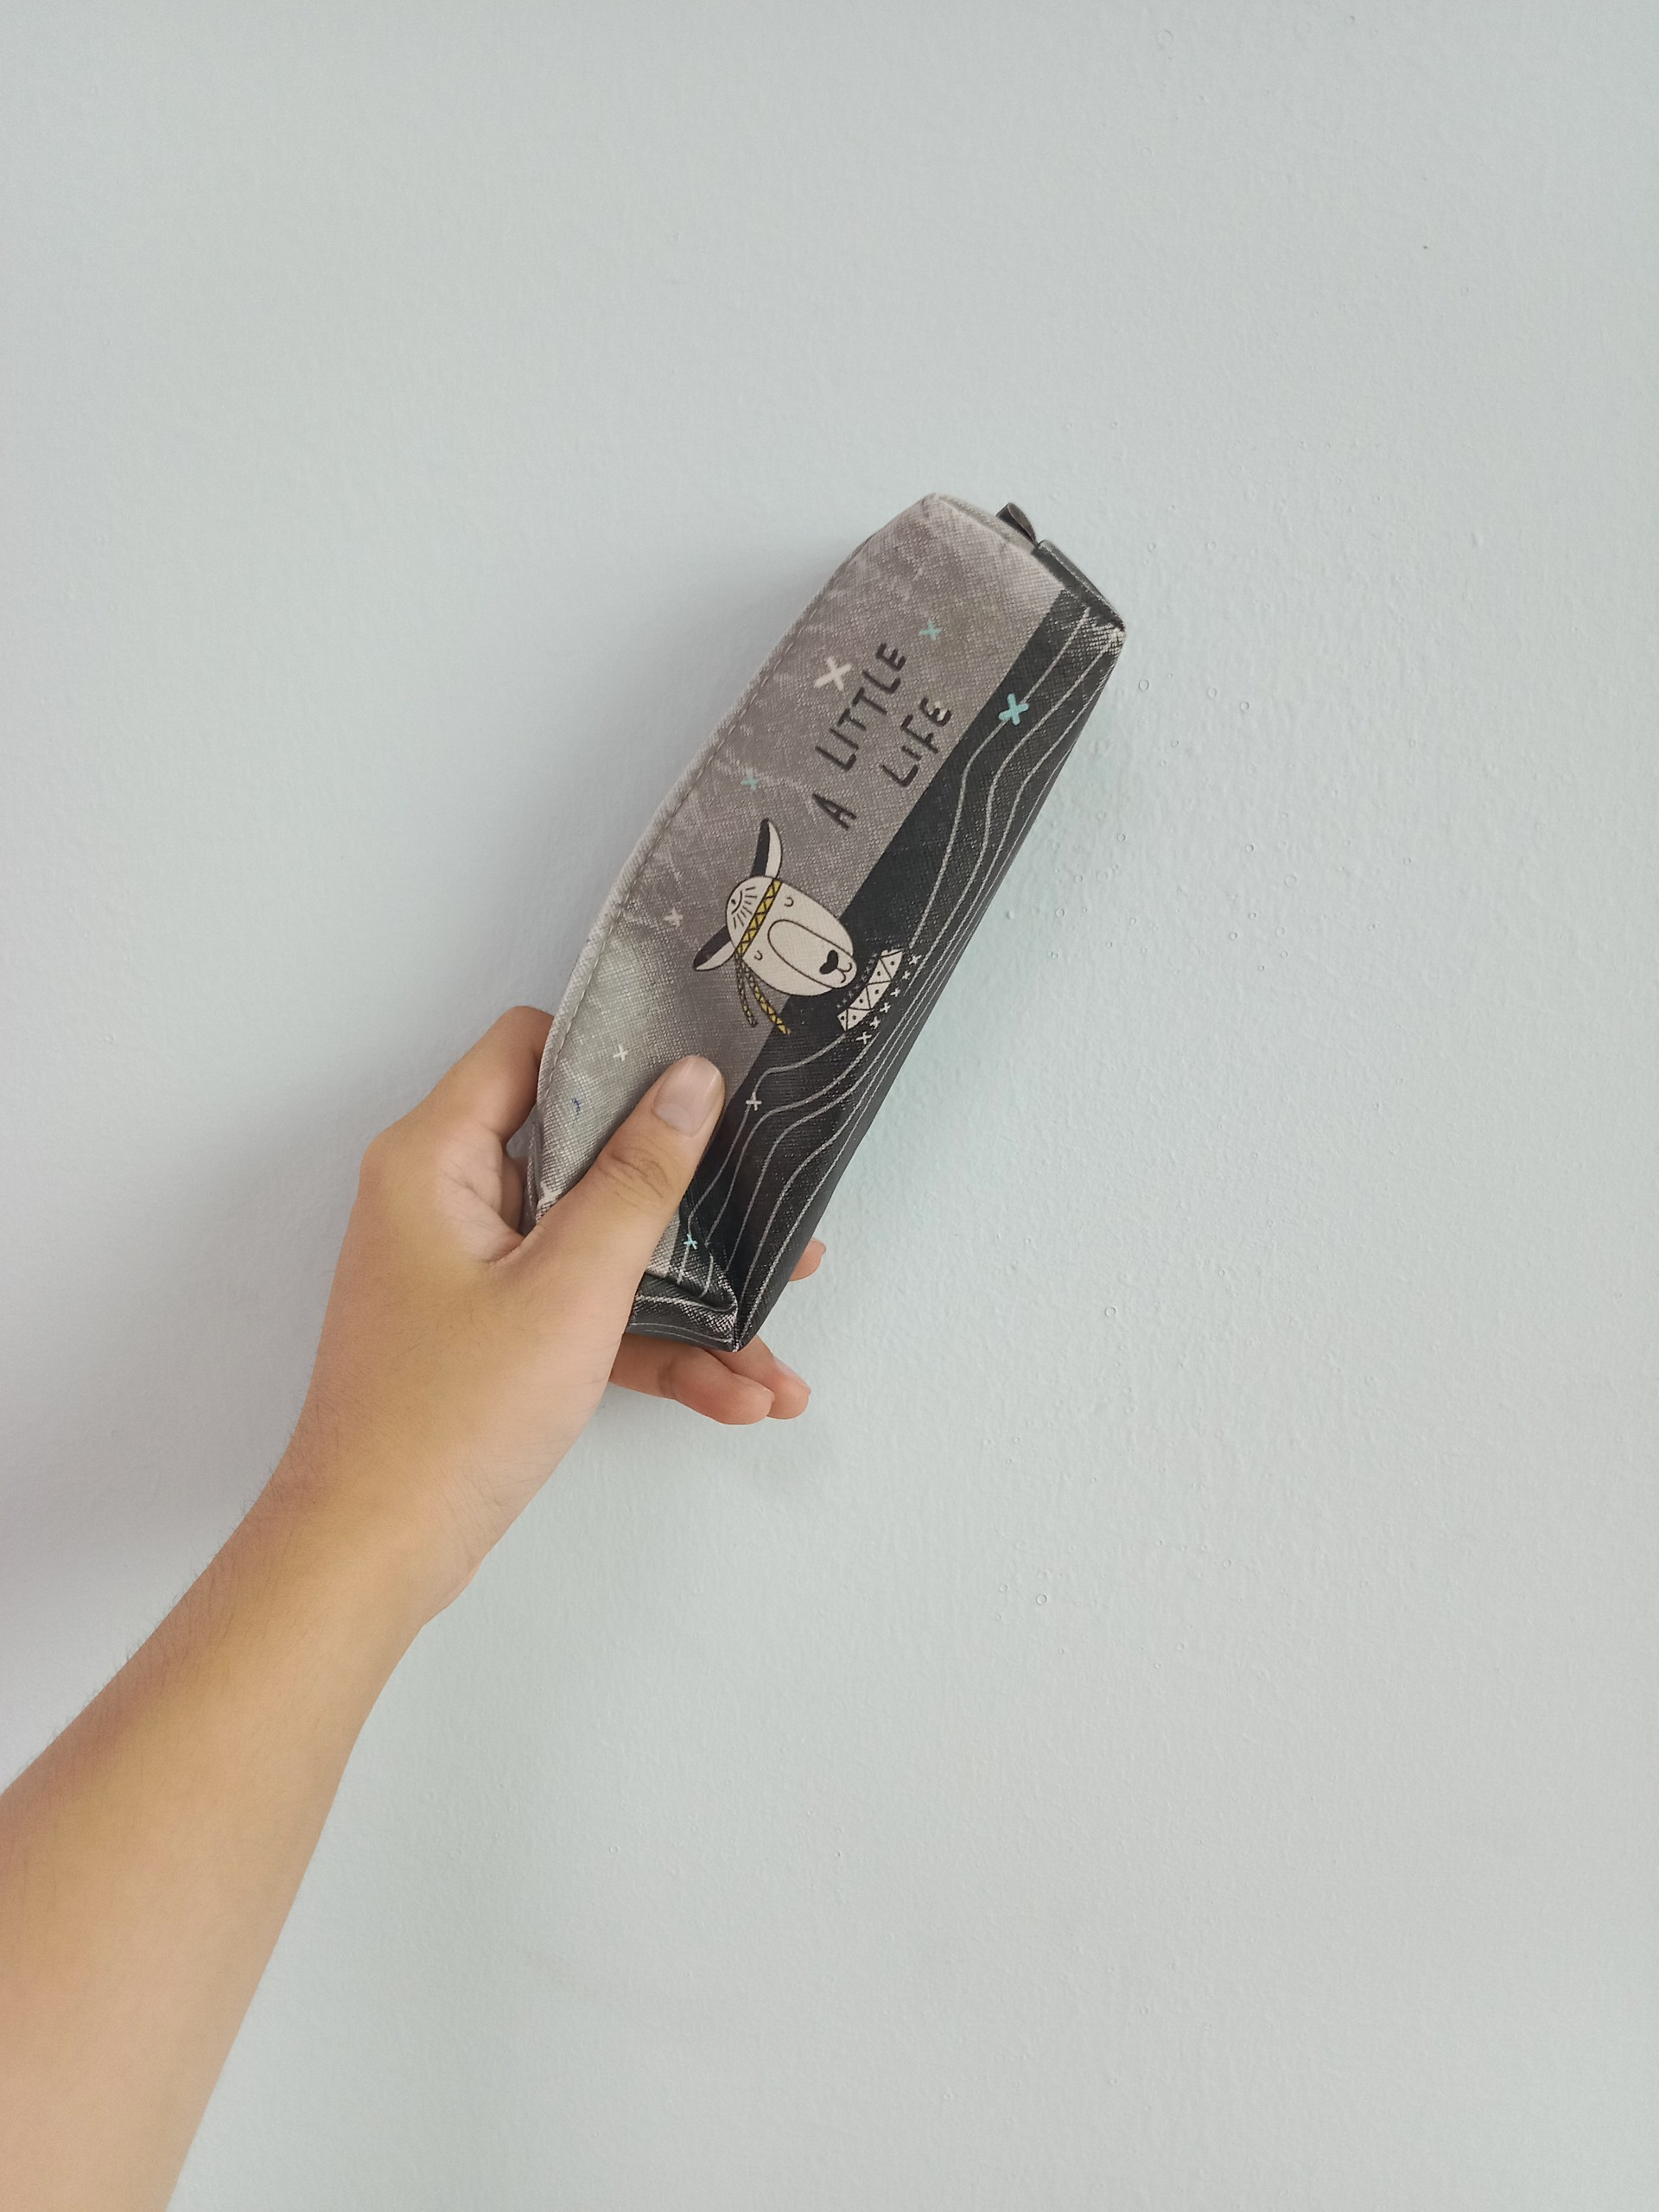

In [91]:
cv2_imshow(img_6)

In [93]:
img_6_pre = np.asarray(img_6_pre)
img_6_pre.shape

(4915200, 1)

In [95]:
img_6_pre = np.reshape(img_6_pre, img_6.shape[:2])

img_6_pre.shape

(2560, 1920)

In [99]:
img_6_pre = img_6_pre*255

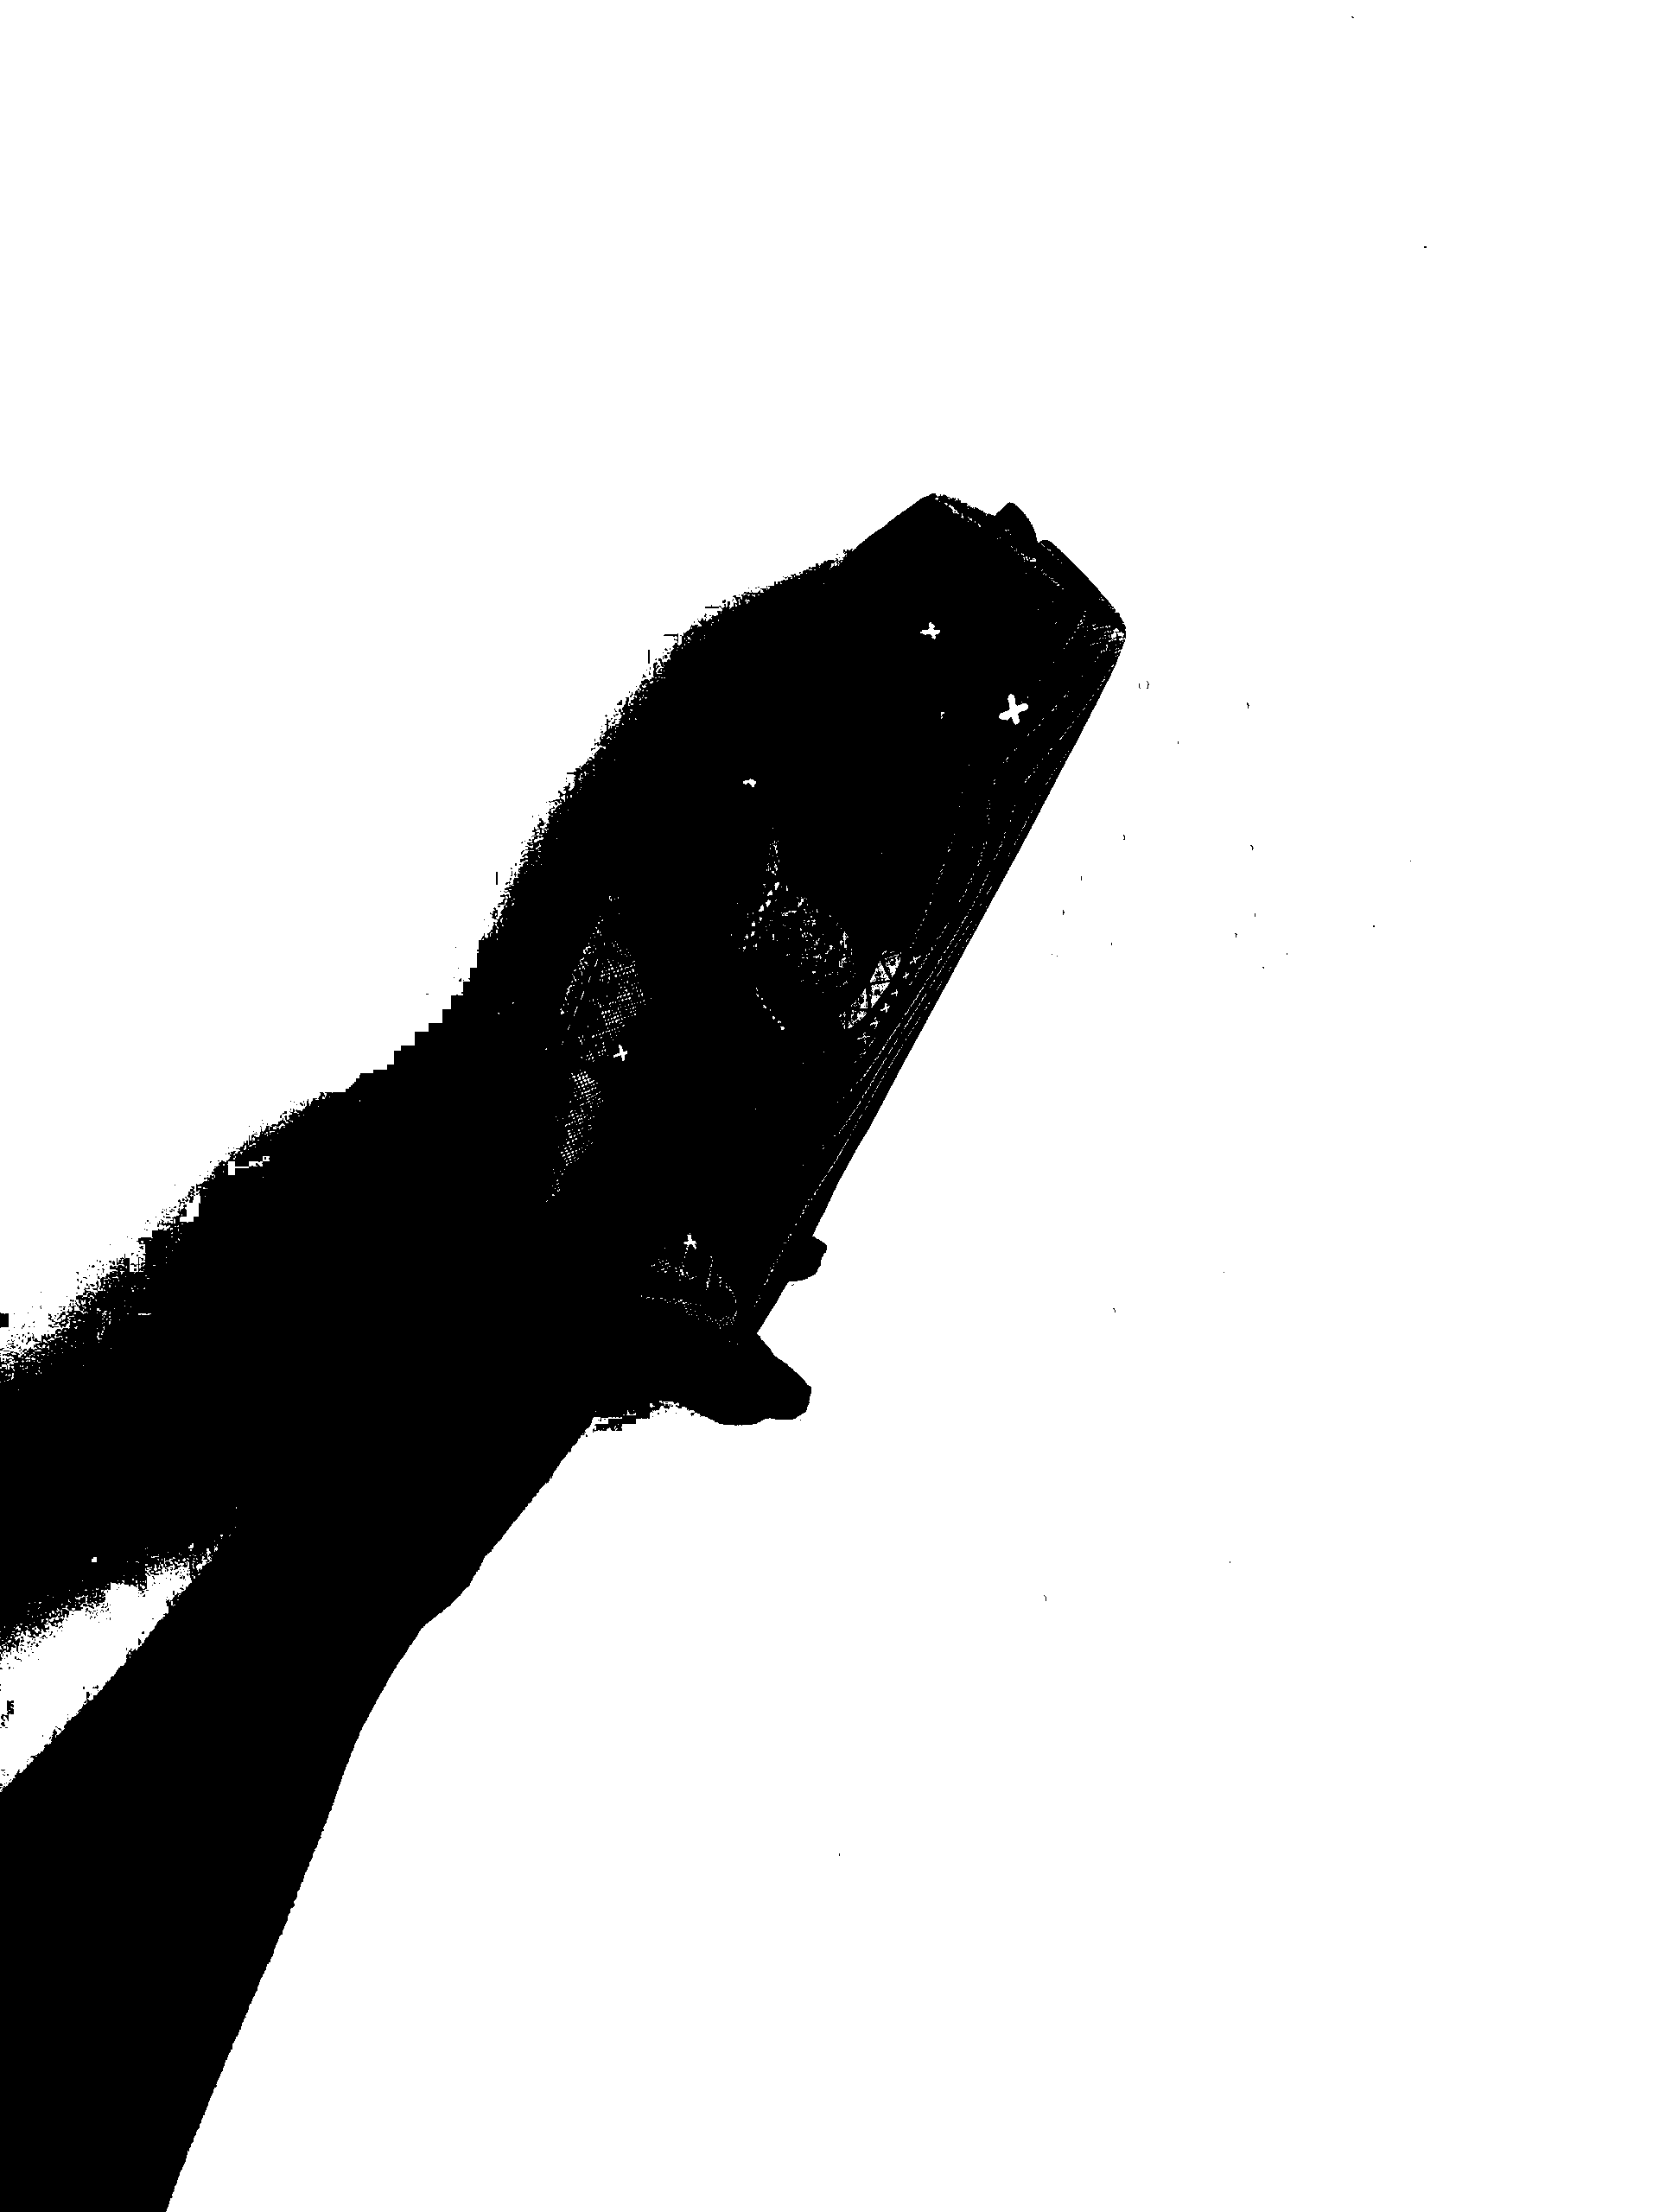

In [100]:
cv2_imshow(img_6_pre)

ĐỌC BACKGROUND MỚI

In [101]:
new_bg = cv.imread(dir_path + 'new_bg.png')

BLEND

In [109]:
new_bg = cv.resize(new_bg, [img_6.shape[1], img_6.shape[0]])


In [110]:
new_bg.shape

(2560, 1920, 3)

In [111]:
alpha = 1

In [112]:
result = img_6.copy()

In [113]:
result[img_6_pre != 0] = alpha*new_bg[img_6_pre != 0] + (1-alpha)*img_6[img_6_pre != 0]

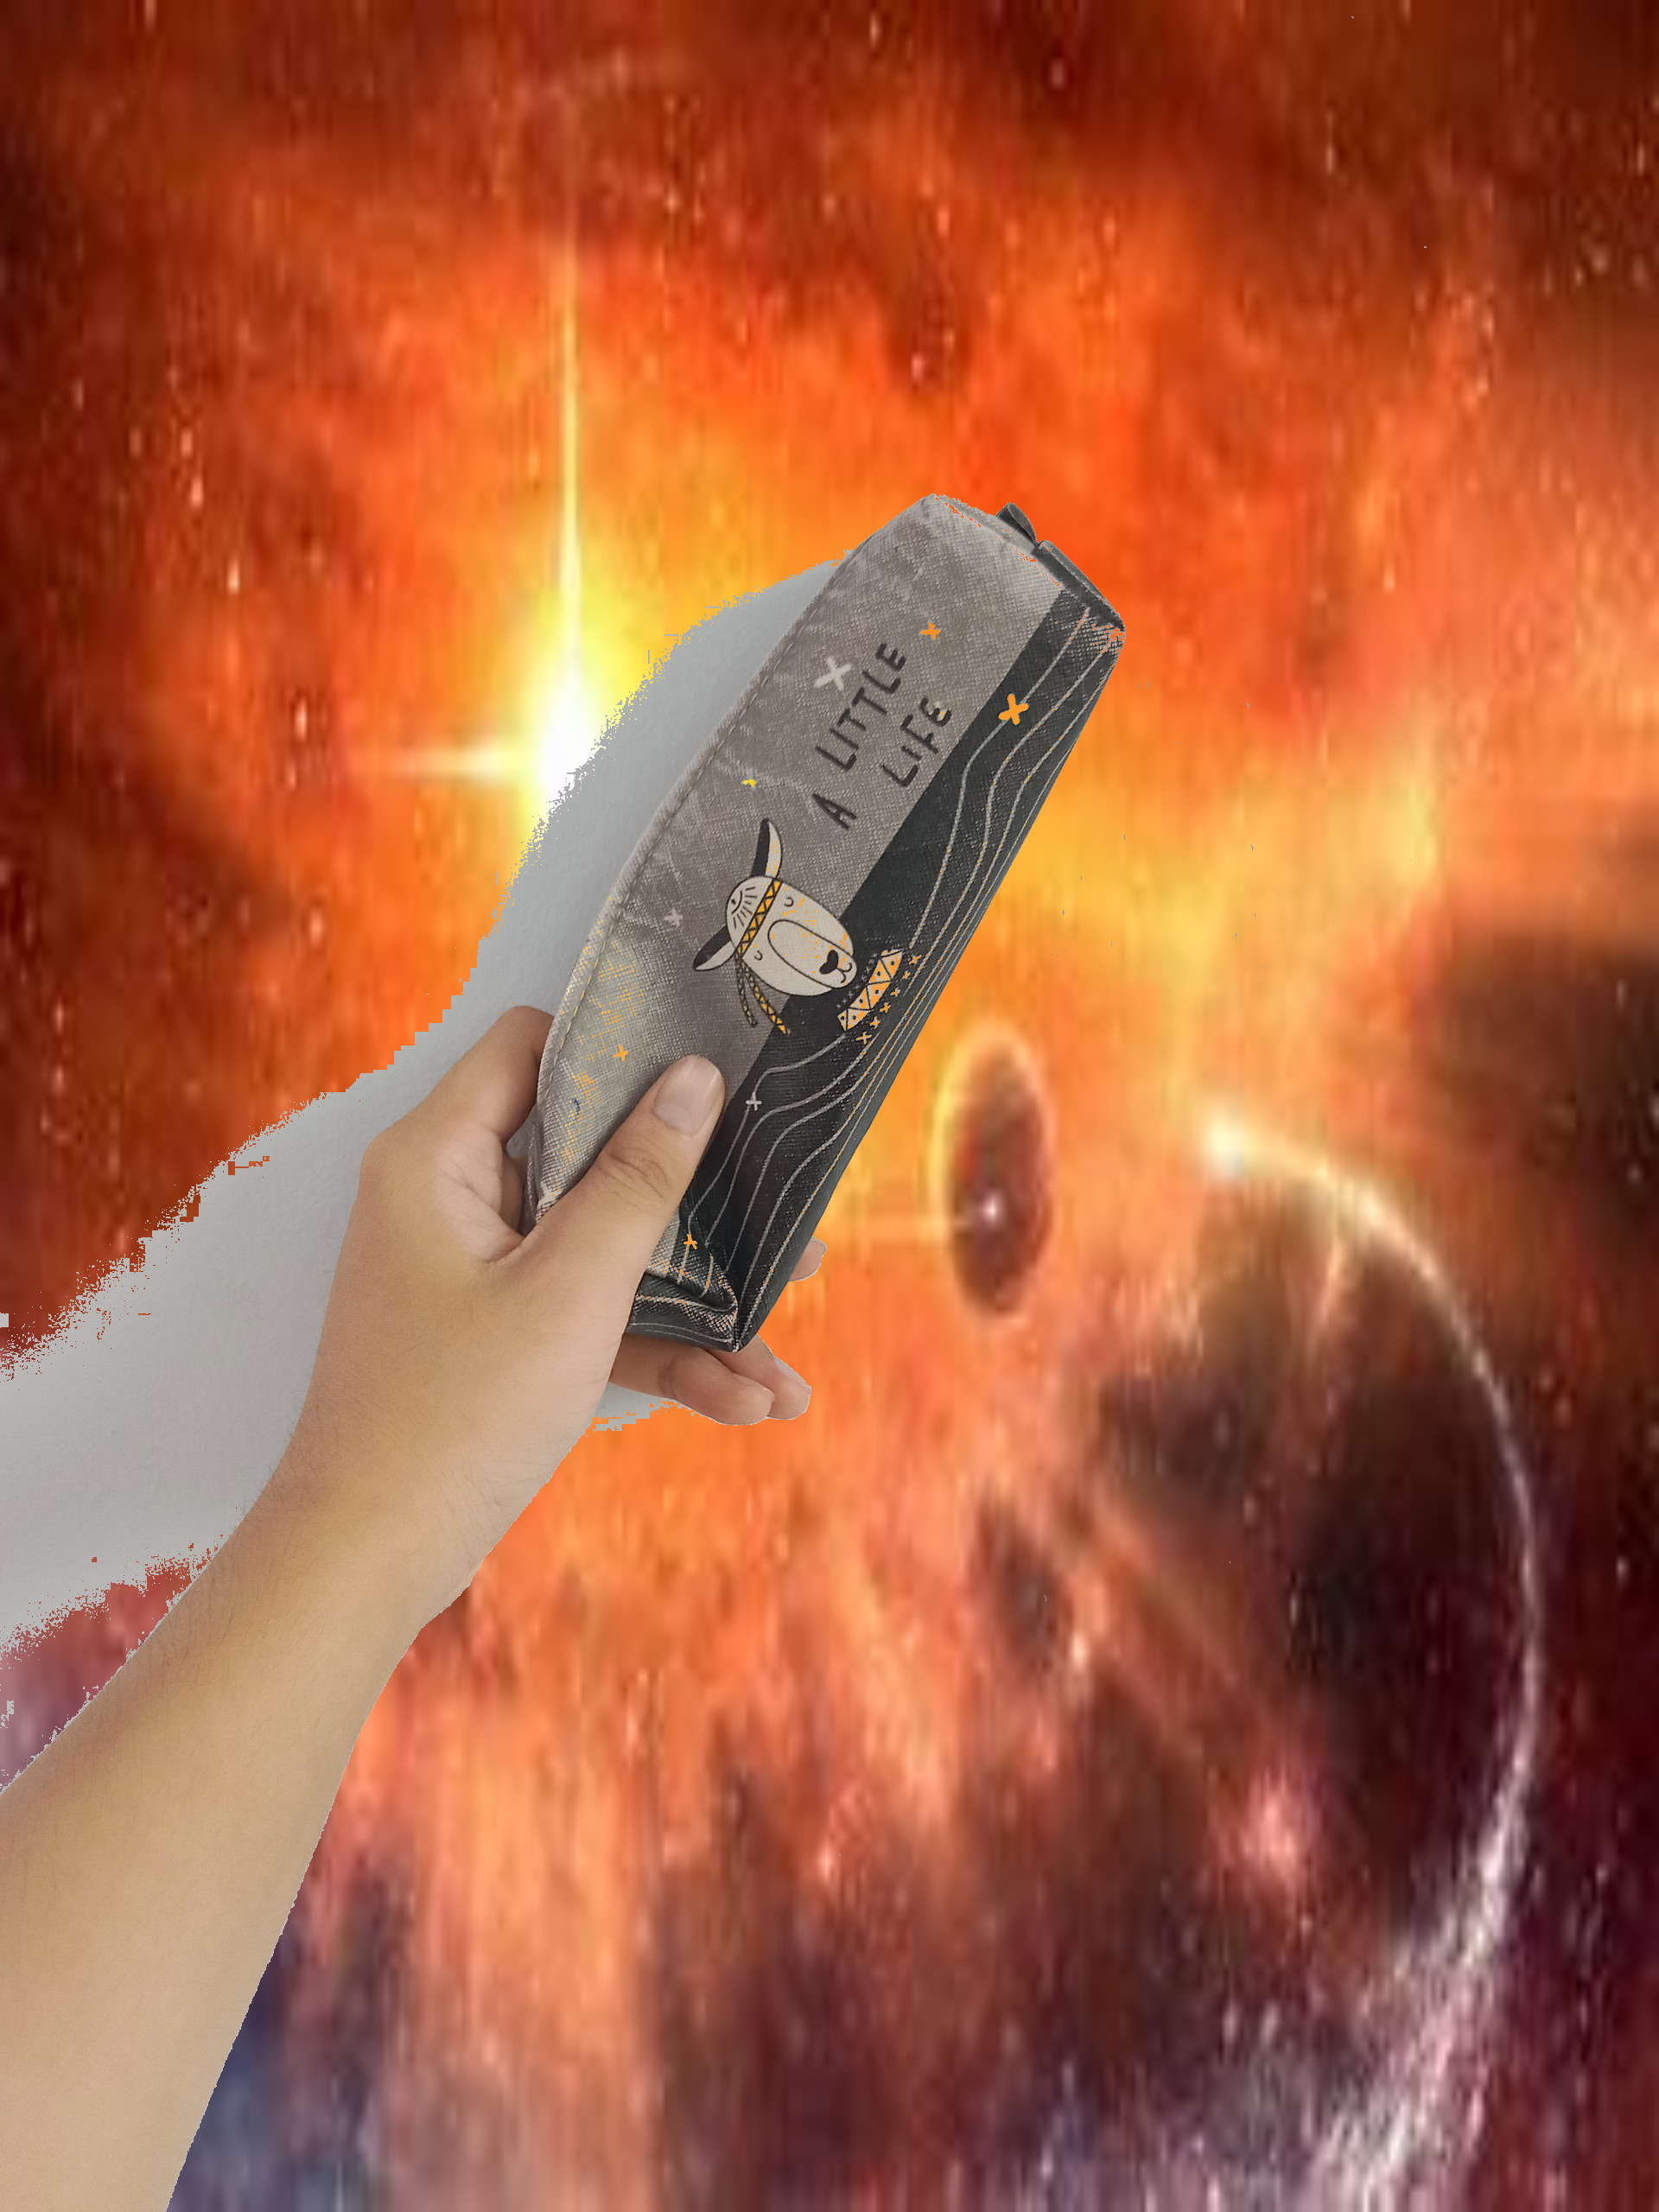

In [114]:
cv2_imshow(result)